In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv("//content//drive//MyDrive//spam.csv", sep=',', encoding='ISO-8859-1')

In [9]:
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [10]:
df = df[['v1', 'v2']]  # Keep only the first two columns: 'v1' (label), 'v2' (message)

# Step 3: Rename the columns to 'label' and 'message'
df.columns = ['label', 'message']

# Step 4: Convert 'spam'/'ham' labels to binary values (spam = 1, ham = 0)
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

# Step 5: Display the first few rows of the cleaned dataframe to confirm
print(df.head())

   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


<ipython-input-10-d1f3bccbfc5f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].map({'spam': 1, 'ham': 0})


In [12]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)


In [13]:
tfidf = TfidfVectorizer(max_features=3000, stop_words='english')  # Using top 3000 features
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [14]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_predictions = nb_model.predict(X_test_tfidf)
print("Naive Bayes Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, nb_predictions) * 100:.2f}%")
print(classification_report(y_test, nb_predictions))

Naive Bayes Model Performance:
Accuracy: 97.76%
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [15]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
lr_predictions = lr_model.predict(X_test_tfidf)
print("\nLogistic Regression Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, lr_predictions) * 100:.2f}%")
print(classification_report(y_test, lr_predictions))


Logistic Regression Model Performance:
Accuracy: 96.32%
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.97      0.75      0.85       150

    accuracy                           0.96      1115
   macro avg       0.97      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [16]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)
svm_predictions = svm_model.predict(X_test_tfidf)
print("\nSVM Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, svm_predictions) * 100:.2f}%")
print(classification_report(y_test, svm_predictions))


SVM Model Performance:
Accuracy: 97.94%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

In [18]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f'{title} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [19]:
def plot_roc_curve(y_true, y_prob, title):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{title} - ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [20]:
def plot_precision_recall_curve(y_true, y_prob, title):
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    plt.figure(figsize=(6,4))
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{title} - Precision-Recall Curve')
    plt.show()

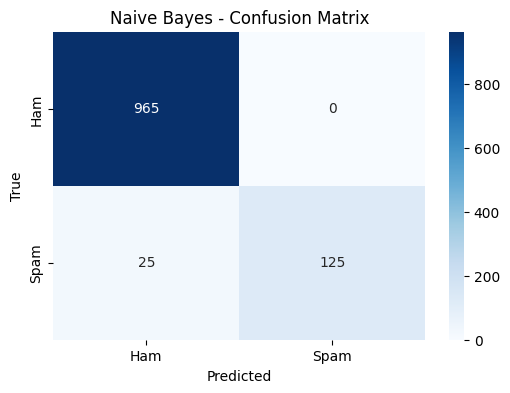

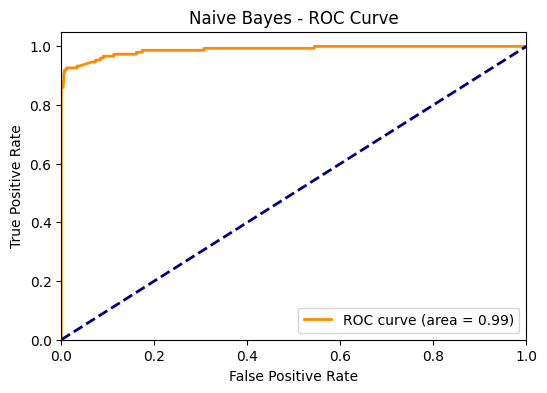

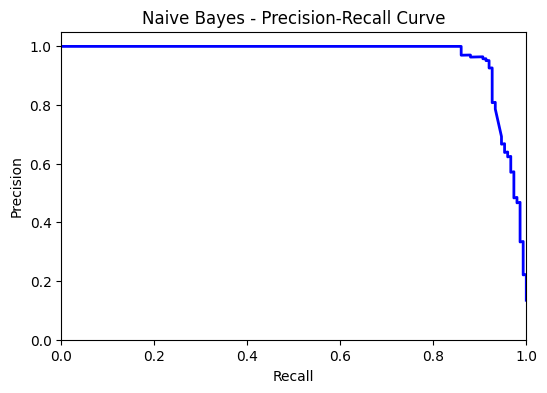

In [21]:
nb_prob = nb_model.predict_proba(X_test_tfidf)[:,1]  # Get probabilities for positive class
plot_confusion_matrix(y_test, nb_predictions, 'Naive Bayes')
plot_roc_curve(y_test, nb_prob, 'Naive Bayes')
plot_precision_recall_curve(y_test, nb_prob, 'Naive Bayes')

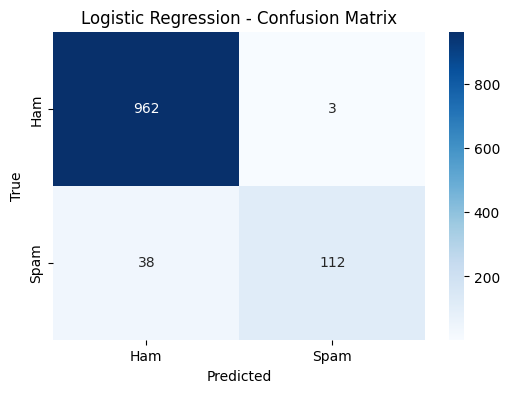

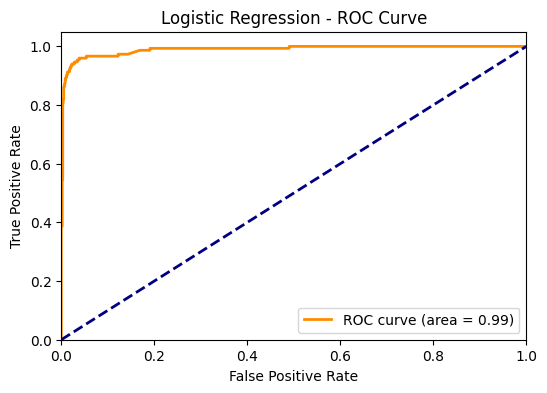

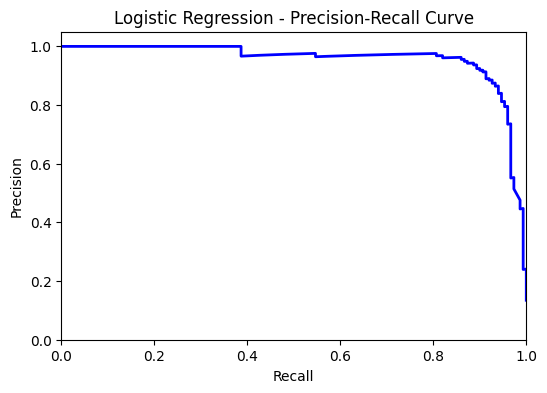

In [22]:
lr_prob = lr_model.predict_proba(X_test_tfidf)[:,1]  # Get probabilities for positive class
plot_confusion_matrix(y_test, lr_predictions, 'Logistic Regression')
plot_roc_curve(y_test, lr_prob, 'Logistic Regression')
plot_precision_recall_curve(y_test, lr_prob, 'Logistic Regression')

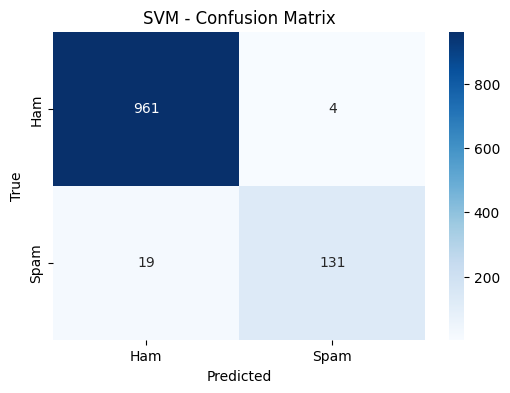

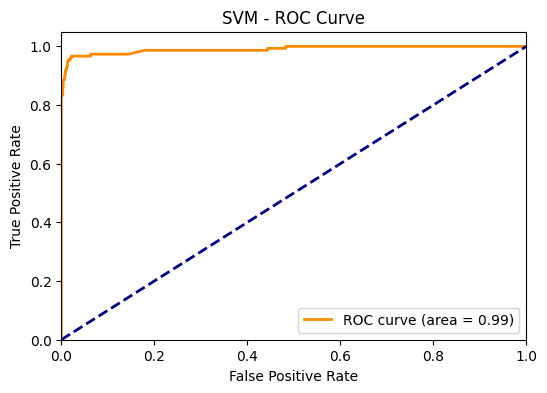

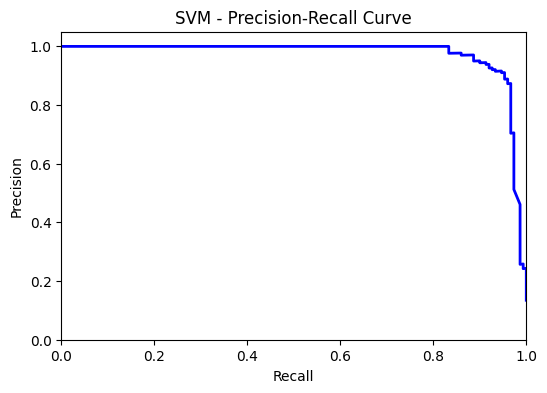

In [23]:
svm_prob = svm_model.decision_function(X_test_tfidf)  # Use decision_function for SVM
plot_confusion_matrix(y_test, svm_predictions, 'SVM')
plot_roc_curve(y_test, svm_prob, 'SVM')
plot_precision_recall_curve(y_test, svm_prob, 'SVM')